In [15]:
import ll

ll.pretty()

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


In [9]:
import datasets

dataset_full = datasets.load_dataset(
    "nimashoghi/mptrj",
    # verification_mode="no_checks",
    # streaming=True,
)
dataset_full

Generating train split:   0%|          | 0/1559916 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/10206 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10273 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms'],
        num_rows: 1559916
    })
    val: Dataset({
        features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms'],
        num_rows: 10206
    })
    test: Dataset({
        features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms'],
        num_rows: 10273
    })


In [24]:
import rich


d = dataset_full["train"].with_format("torch")

rich.print(d[0])
d.num_atoms = d["num_atoms"].numpy()
d.num_atoms

{
    'numbers': tensor[14] i64 x∈[34, 50] μ=37.643 σ=4.924,
    'positions': tensor[14, 3] n=42 x∈[-8.960, 1.614] μ=-2.795 σ=2.779,
    'forces': tensor[14, 3] n=42 x∈[-1.084, 1.084] μ=-2.838e-09 σ=0.456,
    'cell': tensor[3, 3] n=9 x∈[-9.861, 2.515] μ=-2.048 σ=4.511 [[0., -3.429, 1.000e-08], [-9.064, 1.714, 2.515], 
[-0.308, 2.000e-08, -9.861]],
    'pbc': tensor[3] bool x∈[True, True] μ=1.000 σ=0. [True, True, True],
    'energy': tensor -91.338,
    'stress': tensor[3, 3] n=9 x∈[-0.013, 0.010] μ=7.731e-05 σ=0.007 [[-0.002, 1.248e-10, 0.010], [1.248e-10, 
-0.004, -5.305e-10], [0.010, -5.305e-10, -0.013]],
    'e_per_atom_relaxed': tensor -6.888,
    'mp_id': 'mp-1104829',
    'energy_per_atom': tensor -6.794,
    'ef_per_atom_relaxed': tensor -6.888,
    'corrected_total_energy': tensor -95.114,
    'ef_per_atom': tensor -0.903,
    'task_id': 'mp-1104829',
    'calc_id': tensor i64 1,
    'ionic_step': tensor i64 3,
    'filename': 'mp-1104829',
    'extxyz_id': tensor i64 24,
    'num_atoms': tensor i64 14
}

array[1559916] i64 12Mb x∈[1, 444] μ=31.193 σ=29.575

In [8]:
datasets.load_dataset(
    "nimashoghi/oc20-s2ef",
    verification_mode="no_checks",
    streaming=True,
)["2M"].features

{'sid': Value(dtype='string', id=None),
 'fid': Value(dtype='string', id=None),
 'reference_energy': Value(dtype='float64', id=None),
 'num_atoms': Value(dtype='int64', id=None),
 'atomic_numbers': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'pos': Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=-1, id=None),
 'energy': Value(dtype='float64', id=None),
 'forces': Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=-1, id=None),
 'cell': Array2D(shape=(3, 3), dtype='float32', id=None),
 'fixed': Sequence(feature=Value(dtype='bool', id=None), length=-1, id=None),
 'tags': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None)}

In [32]:
d = dataset_full["train"].with_format("numpy")
rich.print(d.features)

{
    'numbers': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
    'positions': Sequence(
        feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None),
        length=-1,
        id=None
    ),
    'forces': Sequence(
        feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None),
        length=-1,
        id=None
    ),
    'cell': Array2D(shape=(3, 3), dtype='float32', id=None),
    'pbc': Sequence(feature=Value(dtype='bool', id=None), length=-1, id=None),
    'energy': Value(dtype='float32', id=None),
    'stress': Array2D(shape=(3, 3), dtype='float32', id=None),
    'e_per_atom_relaxed': Value(dtype='float32', id=None),
    'mp_id': Value(dtype='string', id=None),
    'energy_per_atom': Value(dtype='float32', id=None),
    'ef_per_atom_relaxed': Value(dtype='float32', id=None),
    'corrected_total_energy': Value(dtype='float32', id=None),
    'ef_per_atom': Value(dtype='float32', id=None),
    'task_id': Value(dtype='string', id=None),
    'calc_id': Value(dtype='int64', id=None),
    'ionic_step': Value(dtype='int64', id=None),
    'filename': Value(dtype='string', id=None),
    'extxyz_id': Value(dtype='int64', id=None),
    'num_atoms': Value(dtype='int64', id=None)
}

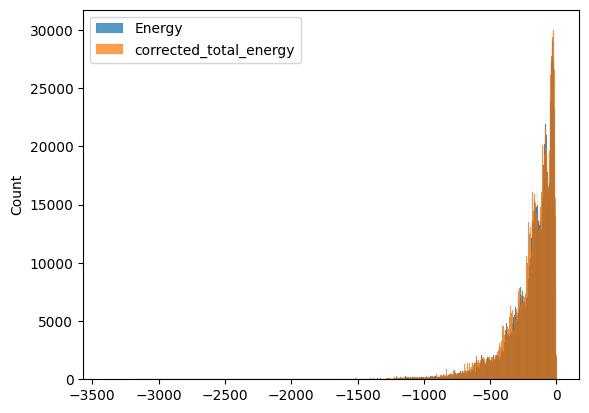

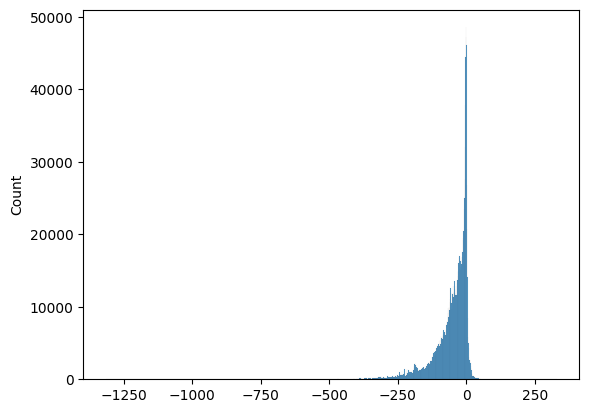

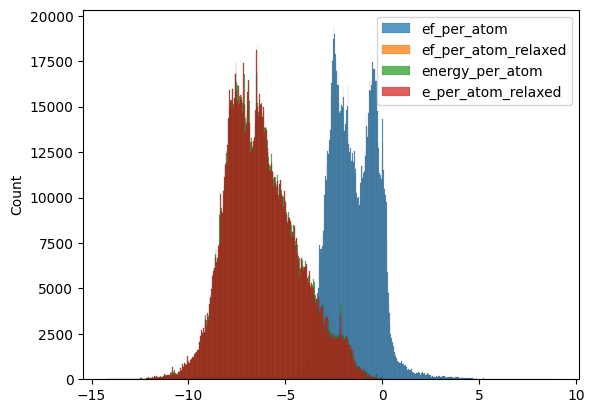

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


# label as "Energy"
fig, ax = plt.subplots()
sns.histplot(d["energy"], label="Energy", ax=ax)
sns.histplot(d["corrected_total_energy"], label="corrected_total_energy", ax=ax)
plt.legend()
plt.show()


sns.histplot(d["ef_per_atom"] * d["num_atoms"])
plt.show()

fig, ax = plt.subplots()
sns.histplot(d["ef_per_atom"], label="ef_per_atom", ax=ax)
sns.histplot(d["ef_per_atom_relaxed"], label="ef_per_atom_relaxed", ax=ax)
sns.histplot(d["energy_per_atom"], label="energy_per_atom", ax=ax)
sns.histplot(d["e_per_atom_relaxed"], label="e_per_atom_relaxed", ax=ax)
plt.legend()
plt.show()